In [1]:
# Numpy.- Proporciona estructuras de datos especializadas, funciones y otras herramientas para computación numérica.

In [26]:
# Ejemplo: Suponer que queremos usar datos climáticos como la Temperatura, Lluvia y Humedad para determinar si una región
#          es adecuada para el cultivo de plantas.
# Rendimiento ( Toneladas x Hectárea )
# Temperatura ( grados fahrenheit )
# Lluvia ( milímetros )
# Humedad ( porcentaje )

# rendimiento = w1 * temperatura + w2 * lluvia + w3 * humedad

# Es decir, intentar calcular la capacidad de producción con base en los datos.

# Las w son para ponderar, ya que en realidad existirían otros factores adicionales. 
w1, w2, w3 = 0.3, 0.2, 0.5


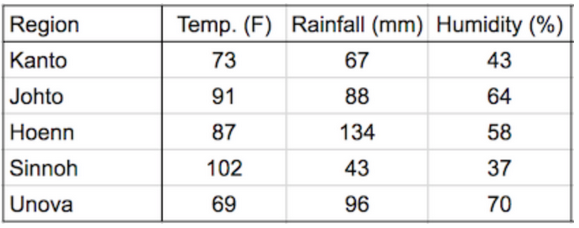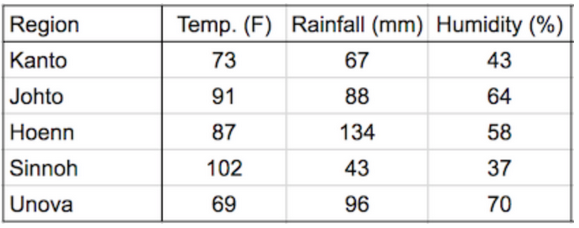

In [10]:
# Se podría algunas variables para registrar los datos de la región de Kanto
kanto_temp  = 73
kanto_lluvia = 67
kanto_humedad = 43

In [11]:
kanto_yield_apples = kanto_temp * w1 + kanto_lluvia * w2 + kanto_humedad * w3
kanto_yield_apples
print("The expected yield of apples in Kanto region is {} tons per hectare.".format(kanto_yield_apples))

The expected yield of apples in Kanto region is 56.8 tons per hectare.


In [12]:
# Debido a que esto no es práctico, es mejor presentar los datos de cada región como un vector
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

In [16]:
# También es posible representar el conjunto de pesos como un vector
weights = [w1,w2,w3]

In [27]:
# Ahora podríamos escribir una función que para calcular el rendimiento de las manzanas usando los datos climaticos y pesos
def crop_yield(region, weights):
    result = 0
    for x, w in zip(region, weights): # zip, toma varios contenedores y regresa un iterador, mapeando los valores de los contenedores
        result += x * w               # rendimiento = (w1 * temperatura) + (w2 * lluvia) + (w3 * humedad)
    return result

In [28]:
crop_yield(kanto, weights)

56.8

In [29]:
crop_yield(johto, weights)

76.9

In [30]:
crop_yield(unova, weights)

74.9

In [31]:
# crop_yield multiplica cada uno de los elementos de los dos vectores y los suma, a esto se le llama "producto escalar"

# Numpy proporciona una función para calcular el producto escalar de 2 vectores, pero primero debemos convertir las 
# listas ntivas de python en arrays de Numpy
!pip install numpy --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.1 which is incompatible.
matplotlib 3.8.3 requires numpy<2,>=1.21, but you have numpy 2.1.1 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.1.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [32]:
import numpy as np

In [33]:
kanto = np.array([73, 67, 43])
kanto

array([73, 67, 43])

In [34]:
weights = np.array([w1, w2, w3])
weights

array([0.3, 0.2, 0.5])

In [35]:
# Los arrays de numpy poseen intrinsecamente las clase ndarray
type(kanto)

numpy.ndarray

In [36]:
type(weights)

numpy.ndarray

In [37]:
# Al igual que las listas los arrays de Numpy admiten la notación de indexación y slicing
kanto[2]

np.int64(43)

In [39]:
kanto[::-1]

array([43, 67, 73])

In [40]:
# Ahora es posible calcular el producto de 2 vectores usando la funcion "dot"
np.dot(kanto, weights)

np.float64(56.8)

In [41]:
# Otro ejemplo útil, aunque no tiene que ver con el tema de la producción de manzanas 
# es que usando el operador * realizar una multiplicación por elementos de 2 array si tienen el mismo tamaño
# además el método sum calcula la suma de números en una matriz.
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

In [42]:
arr1 * arr2

array([ 4, 10, 18])

In [43]:
arr2.sum()

np.int64(15)

In [45]:
# Con esto podemos notar que tiene muchos beneficios convertir las listas de python a arrays de numpy

# Otros beneficios de usar arrays de numpy
#   * Son fáciles de usar, ( kanto * weights).sum()  sería el equivalente a la función crop_yield
#   * Rendimiento. Las operaciones y funciones de Numpy están implementadas en c++ ( mejor que codigo python )


In [46]:
# Prueba de rendimiento entre listas de python y arrays de numpy
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [47]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: user 249 ms, sys: 343 µs, total: 249 ms
Wall time: 247 ms


833332333333500000

In [48]:
%%time
np.dot(arr1_np, arr2_np)

CPU times: user 414 µs, sys: 1.89 ms, total: 2.3 ms
Wall time: 961 µs


np.int64(833332333333500000)

In [49]:
# Arrays multidimensionales.- Ahora podemos representar todos los datos climaticos en un solo array multidimensional
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

In [54]:
# comparado con el algebra lineal, se entiende como una matriz ( 5 filas y 3 columnas )
# Los arrays en numpy pueden tener cualquier numero de dimensiones.
# Se puede consultar la longitud a lo largo de cada dimensión usando la propiedad .shape de un array
climate_data.shape

(5, 3)

In [55]:
weights.shape

(3,)

In [56]:
# Array de 3 dimensiones
# 3D array 
arr3 = np.array([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.5]]])

arr3.shape

(2, 2, 3)

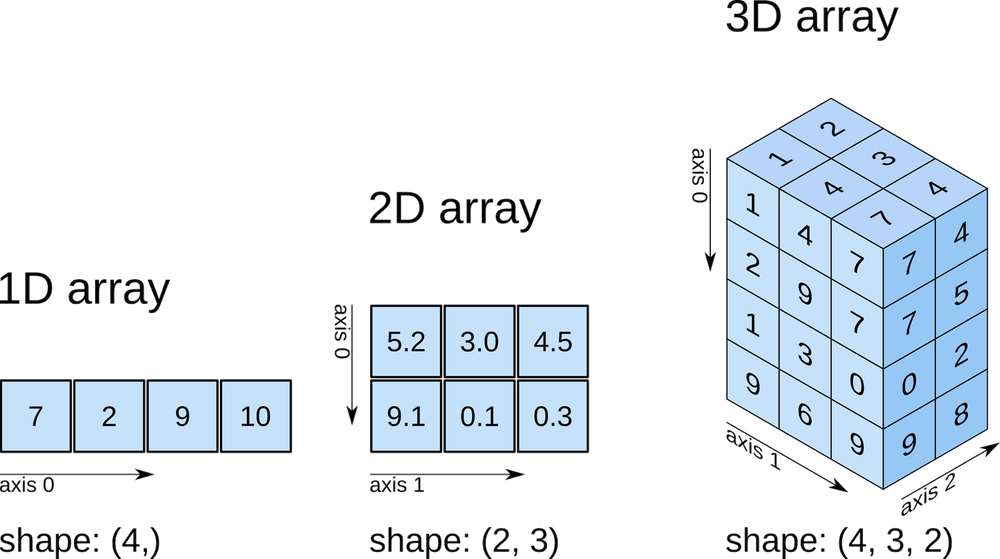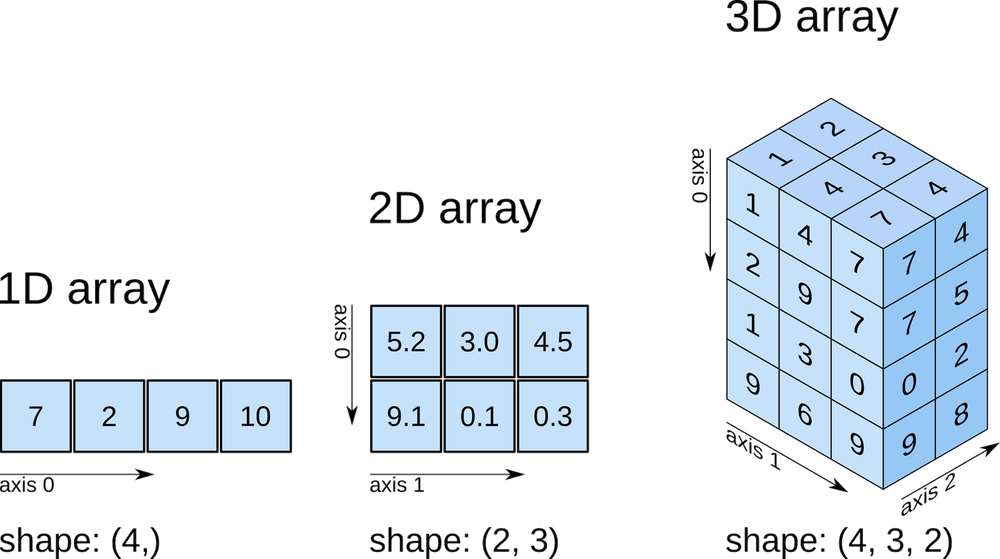

In [57]:
# En los arrays de numpy, todos los elementos poseen el mismo tipo de datos, .dtype
weights.dtype

dtype('float64')

In [58]:
climate_data.dtype

dtype('int64')

In [59]:
arr3.dtype

dtype('float64')

In [60]:
# Ahora podremos calcular la prediccion o capacidad probable de producción de manzanas en todas las regiones
# haciendo una simple multiplicación matricial

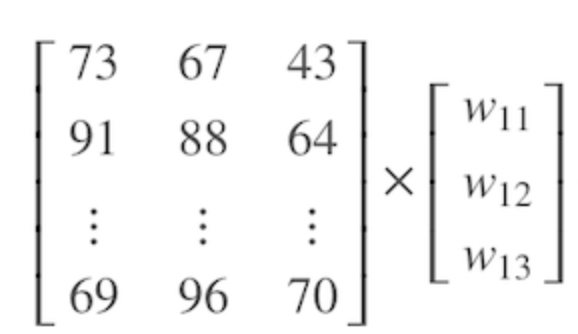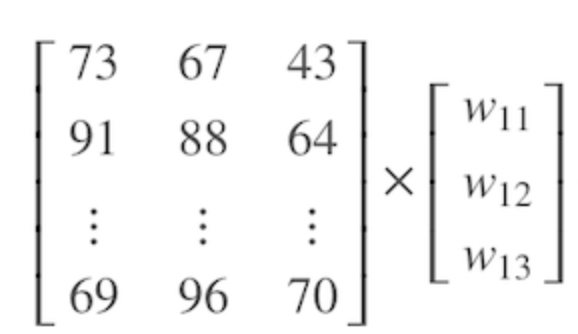

In [61]:
# Para efectuar la operación se puede emplear la función mp.matmul o el operador @
np.matmul(climate_data, weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [62]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [64]:
# Trabajar con archivos csv.- Valores separados por comas
import urllib.request
import urllib.request

urllib.request.urlretrieve(
    'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv', 
    'climate.txt')
    
climate_data = np.genfromtxt('climate.txt', delimiter=',', skip_header=1)

climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [65]:
climate_data.shape

(10000, 3)

In [66]:
# Ahora podriamos generar un array con todas las capacidades de producción de 10 mil regiones usando el operador @
yields = climate_data @ weights
yields

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [67]:
yields.shape

(10000,)

In [68]:
# Vamos a agregar yields a climate_data como una cuarta columna usando la funcion concatenate
climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis=1)

climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

In [70]:
# Para agregar una nueva columna se usa axis = 1, El argumento axis especifica la dimensión de la concatenación
# Los arrays deberían tener el mismo número de dimensiones y la misma longitud ( numero de elentos ) en cada dimensión que 
# se va a usar para la concatenación. 
# Es posible usar np.reshape para cambiar las dimensiones, por ejemplo de yields desde (10000,) a (10000,1)

In [71]:
# Podriamos guardar los datos de los resultados climáticos que ahora contienen la prediccion resultante
np.savetxt('climate_results.txt', 
           climate_results, 
           fmt='%.2f', 
           delimiter=',',
           header='temperature,rainfall,humidity,yeild_apples', 
           comments='')

In [72]:
# Otras operaciones de numpy 
#   Matemáticas: np.sum, np.exp, np.round, operadores aritméticos
#   Manipulación de arrays: np.reshape, np.stack, np.concatenate, np.split
#   Álgebra lineal: np.matmul, np.dot, np.transpose, np.eigvals
#   Estadística: np.mean, np.median, np.std, np.max

In [73]:
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])
                 
arr3 = np.array([[11, 12, 13, 14], 
                 [15, 16, 17, 18], 
                 [19, 11, 12, 13]])

In [74]:
# sumar un escalar
arr2 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [75]:
# resta de cada elemento entre arrays
arr3 - arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [76]:
# Dividir entre un escalar
arr2 / 2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [77]:
# Multiplicar cada elemento entre arrays
arr2 * arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [78]:
# residuos de división entre un escalar
arr2 % 4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]])

In [79]:
# Los arreglos de numpy permiten una acción llamada "broadcasting" para hacer operaciones aritméticas 
# entre dos arrays con distintas dimensiones pero formas compatibles.
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])               
arr2.shape

(3, 4)

In [80]:
arr4 = np.array([4, 5, 6, 7])
arr4.shape

(4,)

In [81]:
arr2 + arr4

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

In [82]:
# Cuando la expresión arr2 + arr4 es evaluada, arr4 (que tiene dimensiones (4,)) es replicada tres veces para lograr 
# las dimensiones (3, 4) de arr2. Numpy ejecuta la replicación sin crear tres copias de la dimensión más pequeña del arreglo.
# Lo que facilita la eficiencia y usa mucha menos memoria.
#  *** Esto solo funciona si uno de los areglos se puede replicar para que coincida con la forma de la otra matriz

In [83]:
arr5 = np.array([7, 8])
arr5.shape

(2,)

In [84]:
arr2 + arr5

ValueError: operands could not be broadcast together with shapes (3,4) (2,) 

In [85]:
# Comparación de arrays.- Numpy soporta operaciones como == , != , > 
arr1 = np.array([[1, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])

arr1 == arr2

array([[False,  True,  True],
       [False, False,  True]])

In [86]:
arr1 != arr2

array([[ True, False, False],
       [ True,  True, False]])

In [87]:
arr1 >= arr2

array([[False,  True,  True],
       [ True,  True,  True]])

In [88]:
arr1 < arr2

array([[ True, False, False],
       [False, False, False]])

In [89]:
# Si recordamos que True = 1 y False = 0 podemos hacer una suma, esto podría ayudar inferir un % de similitud
(arr1 == arr2).sum()

np.int64(3)

In [90]:
# Otros métodos para crear arrays de numpy
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [91]:
np.ones([2,2,3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [92]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [93]:
# Vector aleatorio
np.random.rand(5)

array([0.98058387, 0.38329989, 0.61555928, 0.27834664, 0.73151153])

In [94]:
# Valor fijo
np.full([2,3], 18)

array([[18, 18, 18],
       [18, 18, 18]])

In [96]:
# Rango con inicio, final y tamaño de paso
np.arange(10,90,3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [104]:
# Espacio equilibrado de numeros en un rango ( inicio, final, cantidad de elementos )
np.linspace(3,27,9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])